Epoch 1/50
99/99 [==============================] - 2s 3ms/step - loss: 0.0168
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 8/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 9/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 10/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 11/50
99/99 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 13/50
99/99 [==============================

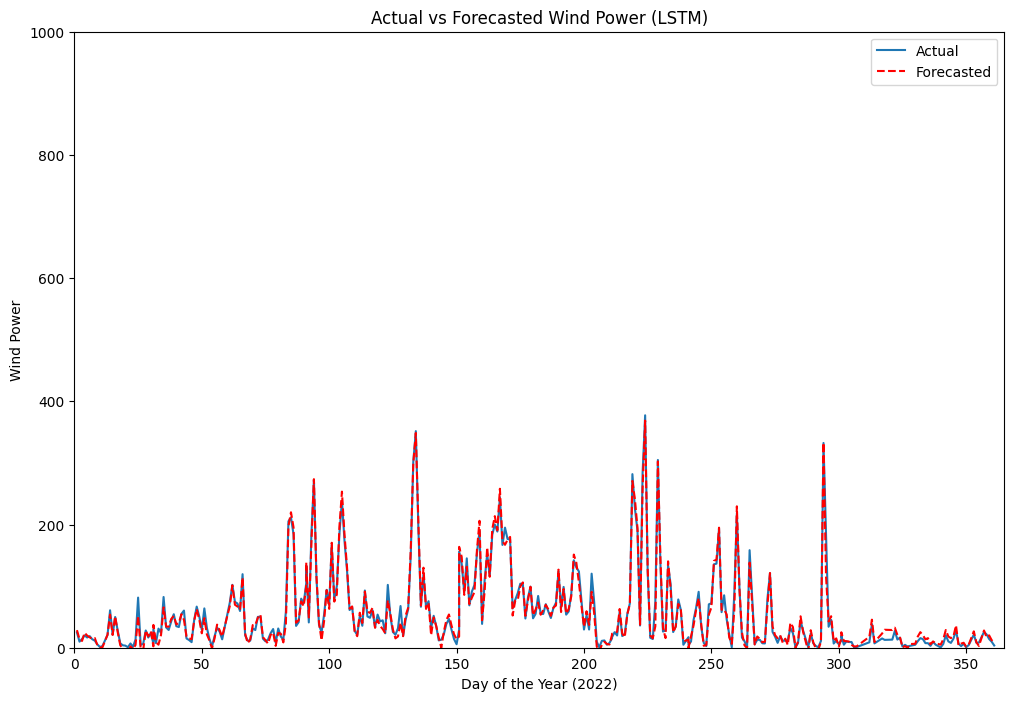

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('/content/Sitakunda_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features + [target]])
test_scaled = scaler.transform(test_df[features + [target]])

# Define X and y for training and testing
X_train = train_scaled[:, :-1]
y_train = train_scaled[:, -1]
X_test = test_scaled[:, :-1]
y_test = test_scaled[:, -1]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(np.hstack((X_test.reshape(-1, len(features)), predictions_scaled)))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_df[target], predictions[:, -1])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_df[target], predictions[:, -1])
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(test_df[target], predictions[:, -1])
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(test_df[target], predictions[:, -1])
print(f"R-squared: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], test_df[target], label='Actual')
plt.plot(test_df['DY'], predictions[:, -1], label='Forecasted',color='red',linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (LSTM)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)

plt.show()


**Modified code to stop variations in output**

Epoch 1/50
101/101 [==============================] - 2s 2ms/step - loss: 0.0172
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 3/50
101/101 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/50
101/101 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 5/50
101/101 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 6/50
101/101 [==============================] - 0s 3ms/step - loss: 8.0253e-04
Epoch 7/50
101/101 [==============================] - 0s 4ms/step - loss: 6.7800e-04
Epoch 8/50
101/101 [==============================] - 0s 4ms/step - loss: 5.7196e-04
Epoch 9/50
101/101 [==============================] - 0s 4ms/step - loss: 4.6521e-04
Epoch 10/50
101/101 [==============================] - 0s 4ms/step - loss: 3.8053e-04
Epoch 11/50
101/101 [==============================] - 0s 3ms/step - loss: 3.4302e-04
Epoch 12/50
101/101 [==============================] - 0s 2ms/step - loss: 3.3411e-

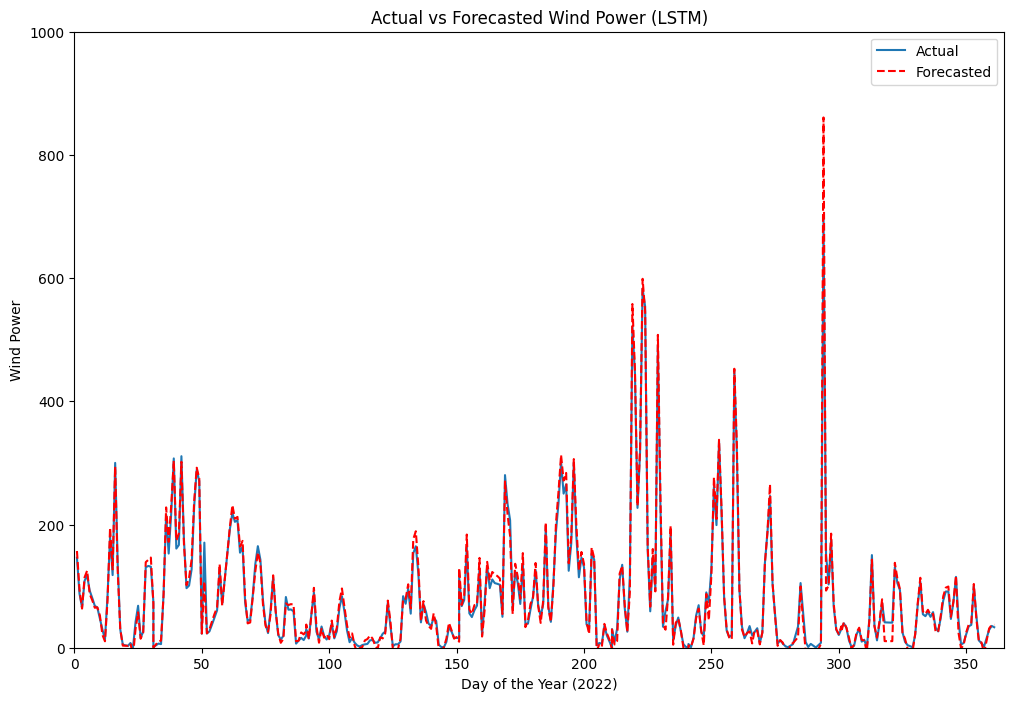

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# Set random seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features + [target]])
test_scaled = scaler.transform(test_df[features + [target]])

# Define X and y for training and testing
X_train = train_scaled[:, :-1]
y_train = train_scaled[:, -1]
X_test = test_scaled[:, :-1]
y_test = test_scaled[:, -1]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(np.hstack((X_test.reshape(-1, len(features)), predictions_scaled)))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_df[target], predictions[:, -1])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_df[target], predictions[:, -1])
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(test_df[target], predictions[:, -1])
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(test_df[target], predictions[:, -1])
print(f"R-squared: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], test_df[target], label='Actual')
plt.plot(test_df['DY'], predictions[:, -1], label='Forecasted',color='red',linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (LSTM)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)

plt.show()
